<a href="https://colab.research.google.com/github/mechanic3000/GB_NN_Intro/blob/Lesson_03/Lesson_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Выведем строку Hello world, а также версию tensorflow

In [10]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.9.2
TensorFlow 2.0 Hello World


Пример создания тензора - 

In [11]:
A = tf.constant([[3, 2], 
                 [5, 2]])

print(A)

tf.Tensor(
[[3 2]
 [5 2]], shape=(2, 2), dtype=int32)


Приме сложения тензеров - 

In [12]:
B = tf.constant([[9, 5], 
                 [1, 3]])

AB = tf.concat(values=[A, B], axis=1)
print(AB.numpy())

[[3 2 9 5]
 [5 2 1 3]]


Пример изменения размерности тензора - 

In [13]:
tensor = tf.constant([[3, 2], 
                      [5, 2], 
                      [9, 5], 
                      [1, 3]])

resh_tensor = tf.reshape(tensor = tensor, shape = [1, 8]) 

print(f'BEFORE {tensor.numpy()}')
print(f'AFTER {resh_tensor.numpy()}')

BEFORE [[3 2]
 [5 2]
 [9 5]
 [1 3]]
AFTER [[3 2 5 2 9 5 1 3]]


Пример умножения матриц, одной из самых частых операций в машинном обучении - 

In [14]:
A = tf.constant([[3, 7], 
                 [1, 9]])


B = tf.constant([[10, 10],
                 [1000, 1000]])

AB = tf.multiply(A, B)
print(AB)


tf.Tensor(
[[  30   70]
 [1000 9000]], shape=(2, 2), dtype=int32)


Функции tensorflow призваны ускорить вычисления, давайте посмотрим на следующий пример - 

# Классификация изображений одежды

Давайте разберем использование tensorflow 2 на примере датасета с одеждой. В это датасете будут находиться маленькие изображения на белом фоне, такие как кросовки, футболки и прочее.

В данном случае мы будем использовать High API от TensorFlow

In [15]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


## Импортируем Fashion MNIST датасет

Мы будет использовать следующий датасет -  [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) Этот датасет содержит 70,000 черно-белых изображений в 10 категориях. Изображения имеют разрешение 28x28 пикселей.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Долгое время в машинном обучение для программ Hello world использовался датасет MNIST с рукописными цифрами. Данный датасет призван несколько усложнить задачу распознования но также подходит в качестве программы Hello world.

В этом датасете 60 000 тренировочных изображений и 10 000 тестовых.

In [16]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Анализ датасета 

Давайте посмотрим структуры полученного массива данных:

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
len(train_labels)

60000

In [20]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [21]:
test_images.shape

(10000, 28, 28)

In [22]:
len(test_labels)

10000

## Preprocess the data

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

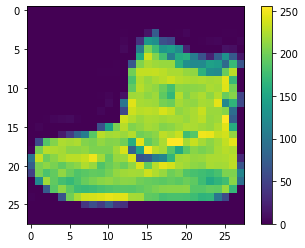

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [24]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Посмотрим первые 25 изображений:

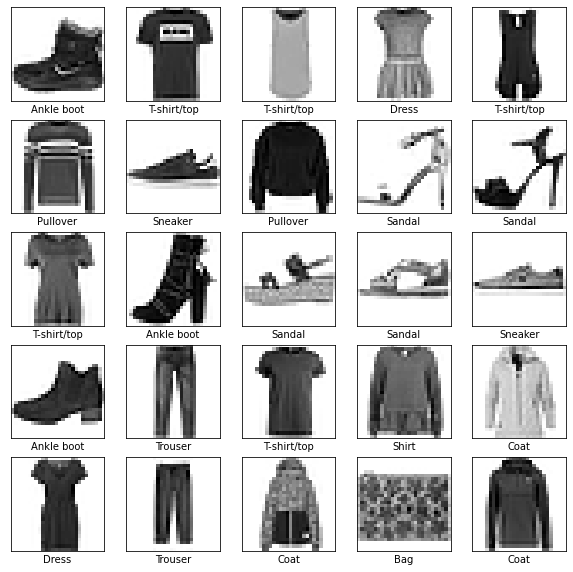

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

### Определение слоев

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(160, activation='swish'),
    keras.layers.Dense(10)
])

Первый слой, `tf.keras.layers.Flatten`, трасформирует двумерный массив на входе в одномерный массив.

Получившиеся 784(28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов , которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать. В нем будет использоваться функция активации softmax и он будет давать предсказание от 0 до 1, где 1 это стопроцентная вероятность.

### Компиляция модели

Давайте вспомним ключевые понятия, которые нам понадобяться при компиляции:

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Тренировка модели

Здесь все стандартно - данные передаются в нейросеть и сопоставляются изображения и лейблы.



### Передача данных в модель

Команда непосредственно запускающая процесс обучения называется - `model.fit`:

In [28]:
model.fit(train_images, train_labels, epochs=9)

Epoch 1/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4827 - accuracy: 0.8299
Epoch 2/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3583 - accuracy: 0.8690
Epoch 3/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3209 - accuracy: 0.8816
Epoch 4/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2962 - accuracy: 0.8899
Epoch 5/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2767 - accuracy: 0.8974
Epoch 6/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2623 - accuracy: 0.9026
Epoch 7/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2482 - accuracy: 0.9078
Epoch 8/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2378 - accuracy: 0.9097
Epoch 9/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2231 - accuracy: 0.9161


In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3401 - accuracy: 0.8857 - 588ms/epoch - 2ms/step

Test accuracy: 0.885699987411499


В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых даыннх и меняем параметры нейросети если точность на тестовых данных нас не устраивает.

### Предсказания нейросети

Команды ниже позволяют проверить работу натренированной ранее нейросети - 

In [30]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [31]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [32]:
predictions[5]

array([1.8268391e-06, 9.9999779e-01, 2.3358537e-10, 1.4875323e-07,
       1.2078395e-07, 1.4447521e-13, 5.1826500e-08, 1.0934143e-12,
       8.8625825e-12, 5.9725308e-10], dtype=float32)

In [33]:
np.argmax(predictions[5])

1

In [34]:
test_labels[5]

1

In [35]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Проверка предсказаний

Matplotlib нам дает возможность посмотреть наше предсказание графически:

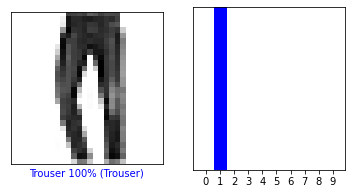

In [36]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

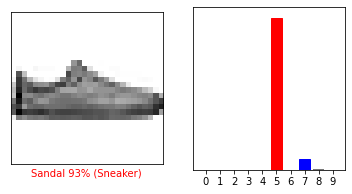

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Давайте сделаем еще несколько предсказаний - 

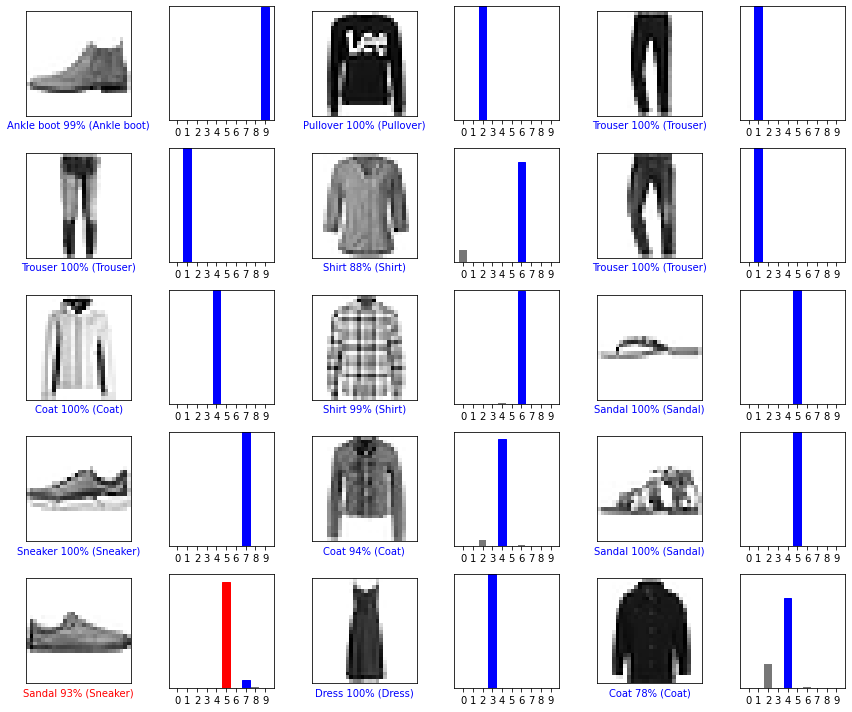

In [38]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Использование полученной модели

Давайте возьмем одно изображение из тестовой выборки и посмотрим предсказание нейронной сети - 

In [39]:

img = test_images[1]

print(img.shape)

(28, 28)


In [40]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [41]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 17ms/step
[[4.02305113e-06 1.07556081e-13 9.99755442e-01 4.66527316e-13
  2.38344481e-04 3.53255424e-12 2.13435760e-06 1.13407653e-17
  1.06884835e-14 1.26811285e-14]]


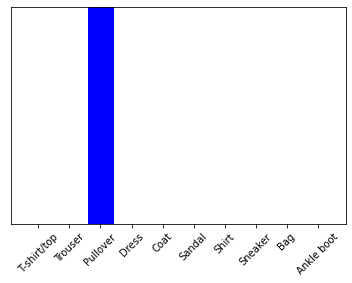

In [42]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` возвращает список списков — по одному списку для каждого предсказания в батче. Нам нужны предсказания только для одного изображения:

In [43]:
np.argmax(predictions_single[0])

2

Нейросеть при хорошо подобранных параметрах должна была выдать корректное предсказание

## Практическое задание

<ol>
    <li>Попробуйте улучшить работу нейронной сети(разобранную на уроке) обучавшейся на датасет Fashion-MNIST. 
       Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?<p>
    </li>
    <li>Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow неразобранные на уроке.<p></li>
    <li>*Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность? </li>

    
    
</ol>

### Ответы

1. Увеличено кол-во эпох до 9, изменена функция активации на swish, увеличено кол-во нейронов до 160 \
Результат - accuracy (test): 0.892
2. 

### IMDb Movie Reviews

In [44]:
from tensorflow import keras
import numpy as np

In [45]:
imdb_reviews = keras.datasets.imdb

(train_data, train_target), (test_data, test_target) = imdb_reviews.load_data(num_words=5000)

In [46]:
train_data.shape, test_data.shape

((25000,), (25000,))

In [47]:
def vectorize_sequences(sequences, dimension=10000):
    # all zero matrix of shape (len(sequences), dimension)
    result = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result

In [48]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_target)
y_test = np.asarray(test_target)

In [49]:
model_2 = keras.Sequential([
    keras.layers.Dense(96, activation='relu', input_shape=(10000, )),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [50]:
model_2.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
model_2.fit(x_train, y_train, epochs=5)

Epoch 1/5
782/782 [==============================] - 7s 9ms/step - loss: 0.3231 - accuracy: 0.8620
Epoch 2/5
782/782 [==============================] - 7s 9ms/step - loss: 0.2052 - accuracy: 0.9178
Epoch 3/5
782/782 [==============================] - 7s 9ms/step - loss: 0.1223 - accuracy: 0.9508
Epoch 4/5
782/782 [==============================] - 7s 9ms/step - loss: 0.0413 - accuracy: 0.9867
Epoch 5/5
782/782 [==============================] - 7s 9ms/step - loss: 0.0156 - accuracy: 0.9957


In [52]:
model_2.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.6965 - accuracy: 0.8675


[0.6964755654335022, 0.8675199747085571]